# Home Task 4

## Importing important Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image




In [34]:
# Load the image
img = Image.open(r'./Image/bird.jpg')  # Replace with your image path
img = np.array(img)  # Convert to a NumPy array (height x width x 3)

- Explanation: The image is read into a NumPy array for easy manipulation. Ensure it has shape (height, width, 3) if it’s an RGB image.

In [35]:
img

array([[[104,  77,  70],
        [101,  74,  67],
        [ 97,  70,  63],
        ...,
        [115,  78,  60],
        [115,  78,  60],
        [113,  76,  58]],

       [[103,  76,  69],
        [100,  73,  66],
        [ 97,  70,  63],
        ...,
        [119,  82,  64],
        [116,  79,  61],
        [108,  71,  53]],

       [[105,  78,  69],
        [102,  75,  66],
        [ 99,  72,  63],
        ...,
        [128,  91,  73],
        [123,  86,  68],
        [112,  75,  57]],

       ...,

       [[157, 126, 105],
        [151, 120,  99],
        [148, 117,  96],
        ...,
        [ 40,  40,  30],
        [ 24,  21,  12],
        [ 22,  19,  10]],

       [[164, 133, 112],
        [149, 118,  97],
        [140, 109,  88],
        ...,
        [ 50,  50,  40],
        [ 18,  15,   6],
        [ 26,  23,  14]],

       [[155, 124, 103],
        [133, 102,  81],
        [142, 111,  90],
        ...,
        [ 32,  32,  22],
        [ 29,  26,  17],
        [ 28,  25,  16]]

## Extracting Red,Green and BLue channels

In [36]:
R = img[:, :, 0]  # Red channel
G = img[:, :, 1]  # Green channel
B = img[:, :, 2]  # Blue channel


In [37]:
R

array([[104, 101,  97, ..., 115, 115, 113],
       [103, 100,  97, ..., 119, 116, 108],
       [105, 102,  99, ..., 128, 123, 112],
       ...,
       [157, 151, 148, ...,  40,  24,  22],
       [164, 149, 140, ...,  50,  18,  26],
       [155, 133, 142, ...,  32,  29,  28]],
      shape=(2313, 2188), dtype=uint8)

In [38]:
G

array([[ 77,  74,  70, ...,  78,  78,  76],
       [ 76,  73,  70, ...,  82,  79,  71],
       [ 78,  75,  72, ...,  91,  86,  75],
       ...,
       [126, 120, 117, ...,  40,  21,  19],
       [133, 118, 109, ...,  50,  15,  23],
       [124, 102, 111, ...,  32,  26,  25]],
      shape=(2313, 2188), dtype=uint8)

In [39]:
B

array([[ 70,  67,  63, ...,  60,  60,  58],
       [ 69,  66,  63, ...,  64,  61,  53],
       [ 69,  66,  63, ...,  73,  68,  57],
       ...,
       [105,  99,  96, ...,  30,  12,  10],
       [112,  97,  88, ...,  40,   6,  14],
       [103,  81,  90, ...,  22,  17,  16]],
      shape=(2313, 2188), dtype=uint8)

- Explanation: Each channel is a 2D matrix of intensity values. Access them by slicing the last dimension of the image array.

## Display the Individual Channels

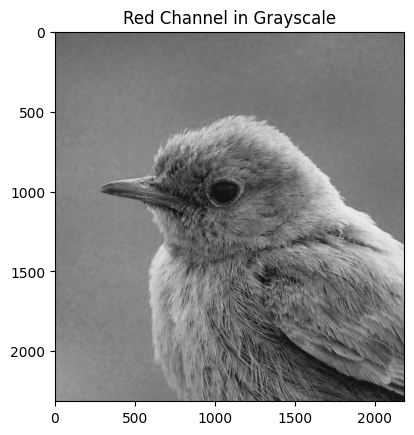

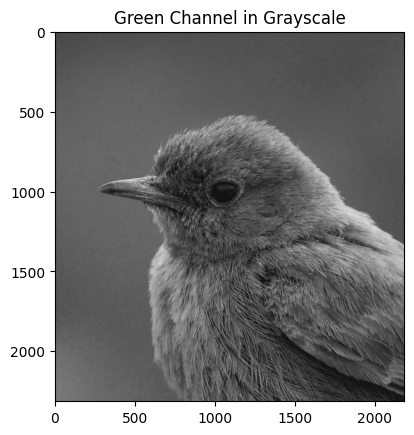

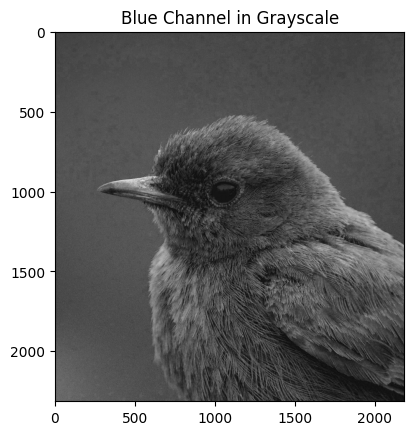

In [40]:
plt.imshow(R, cmap='gray')
plt.title('Red Channel in Grayscale')
plt.show()

plt.imshow(G, cmap='gray')
plt.title('Green Channel in Grayscale')
plt.show()

plt.imshow(B, cmap='gray')
plt.title('Blue Channel in Grayscale')
plt.show()


- Explanation: Using **cmap='gray'** shows the intensity distribution for each channel. You’ll see how bright or dark each pixel is in that color channel.

## Apply PCA to Each Channel

In [41]:
n_components = 30  # Set the number of principal components

def apply_pca(channel):
    # Flatten the 2D channel into shape (height, width)
    h, w = channel.shape
    channel_2d = channel.reshape(h, w)

    # Perform PCA
    pca = PCA(n_components=n_components)
    transformed = pca.fit_transform(channel_2d)

    # Reconstruct the channel using the inverse transform
    reconstructed = pca.inverse_transform(transformed)

    # Reshape back to original dimensions
    reconstructed = reconstructed.reshape(h, w)
    return reconstructed

R_compressed = apply_pca(R)
G_compressed = apply_pca(G)
B_compressed = apply_pca(B)


- Flattening makes the channel a 2D array with height rows and width columns.
- PCA(n_components=n_components) limits the data to the top principal components.
- transform step converts the channel to the principal components.
- inverse_transform step reconstructs the channel from those principal components, effectively reducing noise and data size at the cost of some detail loss.


## Combine Reconstructed Channels

In [42]:
compressed_img = np.dstack((R_compressed, G_compressed, B_compressed)).astype(np.uint8)


- np.dstack stacks the three 2D arrays along a new depth dimension to form a 3D array with shape (height, width, 3).
- astype(np.uint8) converts the floating-point values to 8-bit integers suitable for standard image representation.

## Display Original and Compressed Images

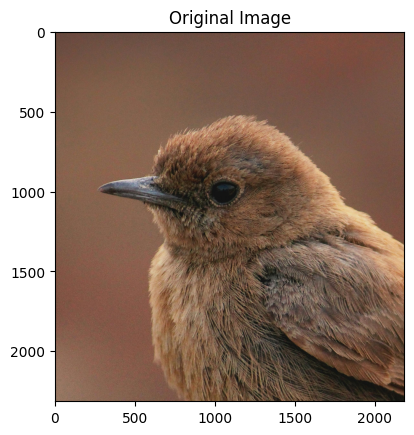

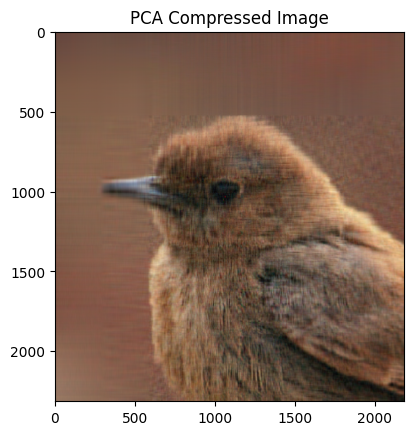

In [43]:
plt.imshow(img)
plt.title('Original Image')
plt.show()

plt.imshow(compressed_img)
plt.title('PCA Compressed Image')
plt.show()


- Explanation:
- This allows visual comparison to see the effect of PCA compression.
- With 30 components per channel, you usually retain most major color and intensity details but might see subtle differences in fine gradients or smooth color transitions.